# Examen Python data developer
# Deel 1
## Introductie
Voor dit examen is het belangrijk dat je volgende zaken zeker doet:
 - Maak een Vitual Environment aan & exporteer een `.yml` (of soortgelijke) file aan die je toevoegt aan je codebase.
 - Maak een github pagina aan met een bijhorende `.gitignore` en `readme.md`. Voeg een link naar de github repo toe aan je readme file.
 - Zorg dat je op het einde de tijd neemt om je code op te schonen zodat deze begrijpelijk is voor derden.
 - Wanneer je klaar bent, maak een `.zip` bestand van je volledige codebase aan en laad deze op in de leeromgeving.

In deze opgave bekijken we een gesimuleerde dataset over de geboortes in België van 2019. De data is te vinden in `.csv` bestanden die gelabeld zijn met de echte geboortedag van de personen in het bestand. Laat ons bijvoorbeeld even kijken naar de eerste 5 lijnen van het bestand `2019-1-1.csv`:

<table align="center">
  <tr>
    <th>gemeente</th>
    <th>naam</th>
    <th>geslacht</th>
    <th>verwachte datum</th>
  </tr>
  <tr>
    <td>Hooglede</td>
    <td>Elias</td>
    <td>Mannelijk</td>
    <td>01/14/2019</td>
  </tr>
  <tr>
    <td>Sint-Niklaas (Sint-Niklaas)</td>
    <td>Pauline</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Wijnegem</td>
    <td>Anita</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Grâce-Hollogne</td>
    <td>Jean-Paul</td>
    <td>Mannelijk</td>
    <td>01/13/2019</td>
  </tr>
  <tr>
    <td>Boussu</td>
    <td>François</td>
    <td>Mannelijk</td>
    <td>01/26/2019</td>
  </tr>
</table>


Hier hebben we de kolommen:
 - **gemeente**: De gemeente waar de persoon geboren is.
 - **naam**: De voornaam van de persoon.
 - **geslacht**: Het geslacht van de persoon (Mannelijk of Vrouwelijk).
 - **verwachte datum**: De verwachte geboortedatum van de persoon.

Dus hier hebben we dan bijvoorbeeld op de eerste lijn de mannelijke persoon Elias die geboren is in Hooglede waarvan men verwachtte dat hij zou geboren worden op `01/14/2019` (Amerikaans formaat) maar in feite geboren is op 1 januari 2019.

Doorheen deze opgave gaan we de data van dichterbij inspecteren! Je kan deze opgaves alternatief lezen in de bijgeleverde notebook `examen.ipynb` waar ook de (meeste) afbeeldingen & resultaten zichtbaar zijn.

In [1]:
# Import packages

# Definieer data locaties

## Utilities

In [1]:
def to_percentage(number):
    return str(np.round(number * 100, 2)) + "%"

def compute_num_unique(df, n_births):
    return len(np.unique(df['naam'].sample(n_births)))

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import sys
import matplotlib.pyplot as plt

# import standards for plotting and colors
sys.path.append('../scripts')
import plotting_standard
plotting_standard.standard_setup()

## Stap 1: data inlezen

Maak een lus over alle bestanden in de map `data/geboortes`, lees elk `.csv` bestand in en voeg deze samen tot 1 grote DataFrame. Merk op dat de datum verwerkt zit in de filename, voeg deze toe aan de kleine DataFrames voor je de dataframes samenvoegt met een `pd.concat(dfs)`.

Voeg een extra kolom toe met een `"dag van het jaar"` getal, dus 1 januari 2019 is `1`, 2 januari 2019 is `2`, enzovoort.

**Opmerking**: Er is ook data voor 29 februari 2019, terwijl dit geen schrikkeljaar is! Plaats deze geboortes in een afzonderlijke DataFrame `df_wrong`. Zet in `df_wrong` een extra kolom met een referentie naar waarom deze data foutief is.

In [2]:
def read_csvs_from_folder(folder_path):
    # Create an empty list to store dataframes
    dfs = []

    # Iterate over each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            # Get the base filename without extension
            file_name_without_extension = os.path.splitext(file_name)[0]
            
            # Read the CSV file into a dataframe
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            
            # Add a new column with the file name
            df['geboortedatum'] = file_name_without_extension
            
            # Append the dataframe to the list
            dfs.append(df)
    
    # Concatenate all dataframes into a single dataframe
    combined_df = pd.concat(dfs, ignore_index=True)
    
    return combined_df

# Example usage:
folder_path = os.path.join('..', 'Data')
df = read_csvs_from_folder(folder_path)

# Print the combined dataframe to check if load has succeeded
print(df)

                           gemeente        naam    geslacht verwachte datum  \
0                          Hooglede       Elias   Mannelijk      01/14/2019   
1       Sint-Niklaas (Sint-Niklaas)     Pauline  Vrouwelijk      01/05/2019   
2                          Wijnegem       Anita  Vrouwelijk      01/05/2019   
3                    Grâce-Hollogne   Jean-Paul   Mannelijk      01/13/2019   
4                            Boussu    François   Mannelijk      01/26/2019   
...                             ...         ...         ...             ...   
116918                         Lede       Lobke  Vrouwelijk      09/12/2019   
116919                     Westerlo      Willem   Mannelijk      09/04/2019   
116920                       Brugge       Diane  Vrouwelijk      09/20/2019   
116921                    Lendelede  Marie-Rose  Vrouwelijk      10/28/2019   
116922                    Vilvoorde       Sofia  Vrouwelijk      09/05/2019   

       geboortedatum  
0           2019-1-1  
1    

In [3]:
# make copy of initial df in order to gain time when re-calculating while developing
df_birth = df.copy()

In [4]:
# Convert 'geboortedatum' to datetime, setting errors='coerce' to handle invalid dates
df_birth['geboortedatum'] = pd.to_datetime(df_birth['geboortedatum'], errors='coerce')

# Make df_wrong: Filter rows where date is '2019-02-29' (= Na's after coercion)
df_wrong = df_birth[df_birth['geboortedatum'].isna()].copy()

# add motivation to dataframe
df_wrong['motivatie'] = 'datum 2019-02-29 bestaat niet'
print(len(df_wrong), 'rows with erroneous date 2019-2-29 were in the dataset')

# in df_birth, get rid of rows where geboortedatum was 2019-2-29 (=Na's after coercion). Needs to be done after df_wrong has been mad.
df_birth = df_birth[~df_birth['geboortedatum'].isna()].copy()

73 rows with erroneous date 2019-2-29 were in the dataset


## Stap 2: Dagelijks aantal geboortes bekijken
#### Vraag 1: Maak een plot van het aantal geboortes per dag van het jaar. 

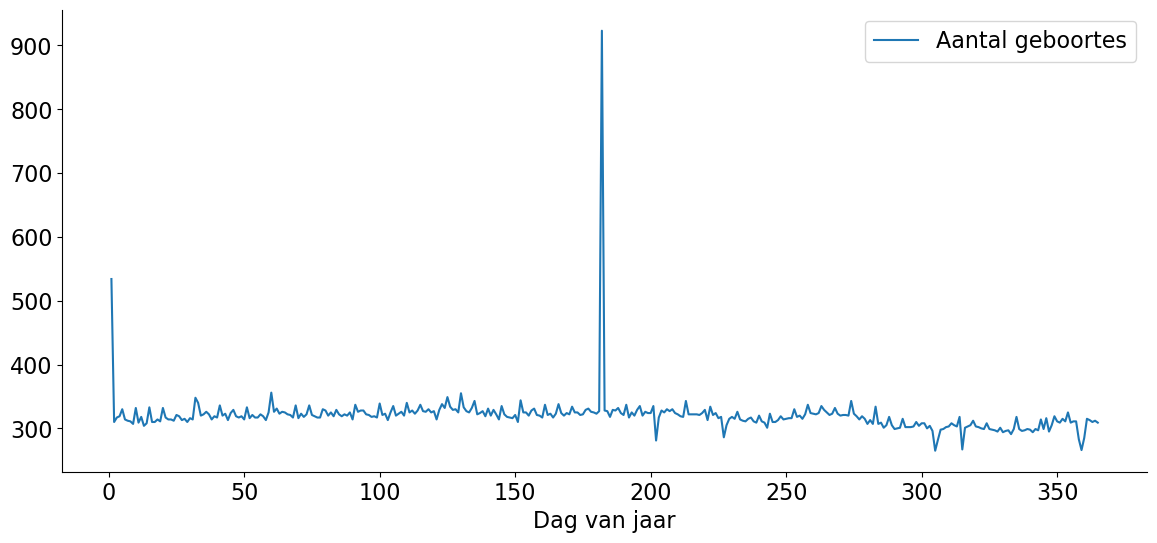

In [5]:
# Change date type of 'geboortedatum' to datetime
df_birth['geboortedatum'] = pd.to_datetime(df_birth['geboortedatum'])

# Calculate days since start of year
df_birth['start_van_jaar'] = df_birth['geboortedatum'].apply(lambda x: pd.Timestamp(year=x.year, month=1, day=1))
df_birth['dag_van_jaar'] = (df_birth['geboortedatum'] - df_birth['start_van_jaar']).dt.days + 1

# Make df that is a groupby of count of births per day
df_birth_day = (df_birth.groupby('dag_van_jaar').count()
                 .drop(columns = ['gemeente', 'geslacht', 'verwachte datum', 'geboortedatum', 'start_van_jaar'])
                 .rename(columns={'naam': 'aantal geboortes'})
                )
df_birth_day 

# Make plot
plt.plot(df_birth_day.index, df_birth_day['aantal geboortes'], label = 'Aantal geboortes')
plt.xlabel('Dag van jaar')
plt.legend();

##

#### Vraag 2: Outliers vinden & behandelen

We klassificeren een datum als een outlier als het aantal geboortes meer dan `50%` afwijkt van de gemiddelde waarde overheen de volledige dataset. Zoek alle outliers in de dataset.

[Timestamp('2019-01-01 00:00:00'), Timestamp('2019-07-01 00:00:00')]

In [6]:
# df_birth_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   aantal geboortes  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [9]:
# Calculate average births per day
births_av = df_birth_day[['aantal geboortes']].mean(axis=0)
print('average births per day:', round(births_av))

# Calculate deviation
deviation = 0.50 * births_av

# Calculate 50% upper and lower deviations
upper_value = int(births_av + deviation)
lower_value = int(births_av - deviation)

print('upper bound:', upper_value, 'lower bound:', lower_value)

print("") # blank line for easier output reading experience

# Get all outliers
df_outlier_days_upper = df_birth_day[(df_birth_day['aantal geboortes'] > upper_value)]
df_outlier_days_lower = df_birth_day[(df_birth_day['aantal geboortes'] < lower_value)]
print('Outliers upper are on the following days:')
print(df_outlier_days_upper.index)

print("")
print('Outliers lower are on the following days:')
print(df_outlier_days_lower.index)

average births per day: aantal geboortes    320.0
dtype: float64
upper bound: 480 lower bound: 160

Outliers upper are on the following days:
Int64Index([1, 182], dtype='int64', name='dag_van_jaar')

Outliers lower are on the following days:
Int64Index([], dtype='int64', name='dag_van_jaar')


Ik zal je vertellen; de outliers op 1 januari en 1 juli komen doordat alle geboortes waarvoor de datum niet correct genoteerd is, de datum 1 januari (voor de eerste helft van het jaar) en op 1 juli (voor de tweede helft van het jaar) geplaatst worden. Om dit op te lossen, halen we in de grote geboortes DataFrame (met 1 lijn per geboorte) deze twee datums er volledig uit. Dus we gaan **alle** geboortes van 1 januari en 1 juli verwijderen uit deze dataframe en toevoegen aan de `df_wrong` dataframe met als reden `2019-01-01` en `2019-07-01`.

In [13]:
# wrong dates in a list
wrong_dates = ['2019-01-01', '2019-07-01']

# make new df_wrong with all the rows where geboortedatum is in list wrong_dates
df_wrong_halfyr = df_birth[df_birth['geboortedatum'].isin(wrong_dates)].copy()
df_wrong_halfyr['motivatie'] = df_wrong_halfyr.geboortedatum

# append new wrong df to former df_wrong
wrong_df_list = [df_wrong, df_wrong_halfyr]
df_wrong = pd.concat(wrong_df_list)
print('Amount of rows with erroneous values after clean up of two dates:', len(df_wrong))

# get rows with two dates out of df_birth
df_birth_clean = df_birth[~df_birth['geboortedatum'].isin(wrong_dates)].copy()
print('Amount of rows in cleansed dataframe after clean up of two dates:', len(df_birth_clean))

Amount of rows with erroneous values after clean up of two dates: 5901
Amount of rows in cleansed dataframe after clean up of two dates: 115393


Maak dezelfde plot nu opnieuw met het aantal geboortes per dag.

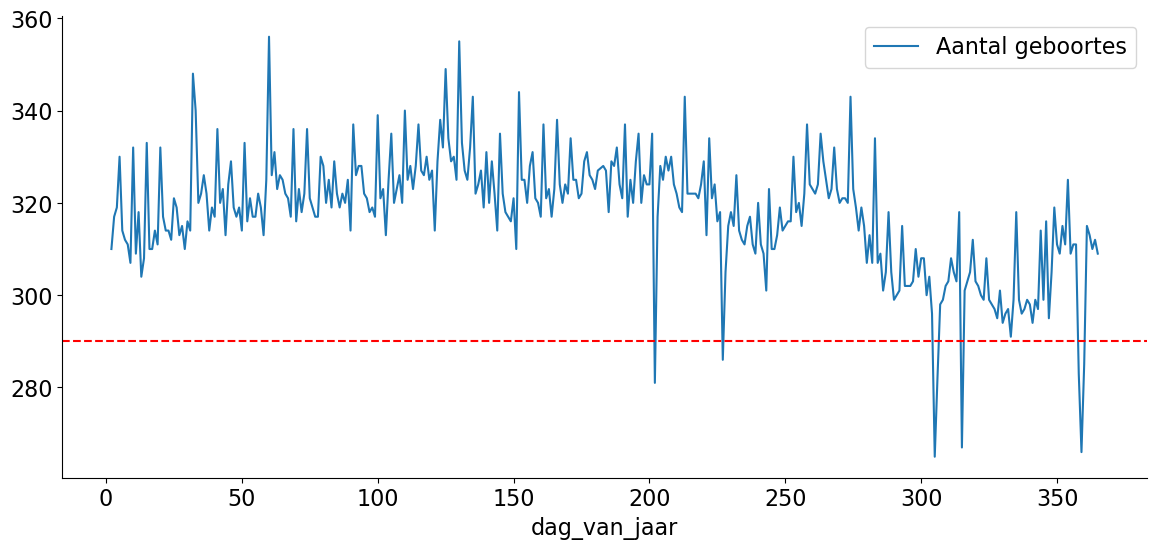

In [56]:
# Make df that is a groupby of count of df_birth per day after clean-up of two dates
df_birth_day_clean = (df_birth_clean.groupby('dag_van_jaar').count()
                      .drop(columns = ['gemeente', 'geslacht', 'verwachte datum', 'start_van_jaar'])
                      .rename(columns={'naam': 'aantal geboortes'})
                     )

df_birth_day_clean
treshold = 290

# Make plot with treshold line
plt.plot(df_birth_day_clean.index, df_birth_day_clean['aantal geboortes'], label = 'Aantal geboortes')
plt.xlabel('dag_van_jaar')
plt.legend()
plt.axhline(y=treshold, color='r', linestyle='--');

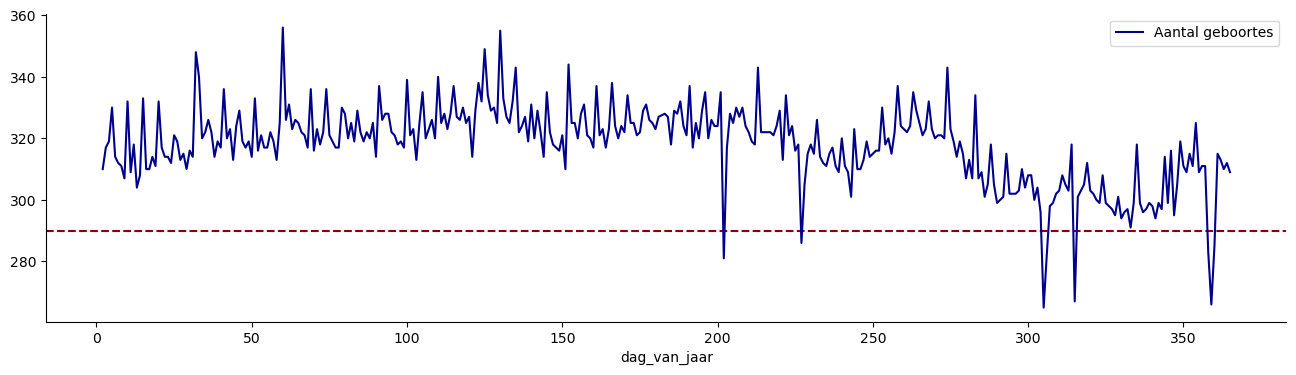

 We zien dat er nog steeds redelijk wat uitschieters zijn, kan je code schrijven om de 5 extreme uitschieters in de 2e helft van het jaar identificeren (in totaal 8 datums)?

In [57]:
# make dataframe grouped by birthday
df_birth_birthday = (df_birth_clean.drop(columns = ['gemeente', 'geslacht', 'verwachte datum', 'start_van_jaar'])
                     .groupby('geboortedatum')
                     .agg({'naam':'count',
                          'dag_van_jaar':'min'})
                     .rename(columns={'naam': 'aantal geboortes'})
                     .reset_index()
                    )

# from df that is grouped per day, filter on second half of year
df_birth_day_clean_2ndyearhalf = df_birth_birthday[df_birth_birthday['dag_van_jaar'] > 181]
df_birth_day_clean_2ndyearhalf

# Get low outliers
df_outliers_low = df_birth_day_clean_2ndyearhalf.nsmallest(8, 'aantal geboortes')

# clean up df with outliers for a clearer view
df_outliers_low = (df_outliers_low
#                    .rename(columns={'naam': 'aantal geboortes'})
#                    .drop(columns=['gemeente', 'geslacht', 'verwachte datum', 'start_van_jaar', 'geboortedatum'])
                   .reset_index()
                  )
df_outliers_low

,index,geboortedatum,aantal geboortes,dag_van_jaar
0,302,2019-11-01,265,305
1,356,2019-12-25,266,359
2,312,2019-11-11,267,315
3,199,2019-07-21,281,202
4,303,2019-11-02,282,306
5,355,2019-12-24,283,358
6,357,2019-12-26,285,360
7,224,2019-08-15,286,227


### Bonusvraag: wekelijkse verbanden

We zien vele pieken en dalen in de evolutie van het aantal geboortes. We willen deze grafiek graag iets "gladder" maken. Kan je hiervoor eens een visualizatie maken van het **gemiddeld** aantal geboortes per week (dit voor elke week, dus maandag-maandag, dinsdag-dinsdag, woensdag-woensdag, ...).

In [22]:
# df_birth_birthday = df_birth_clean.reset_index()
# # df_birth_birthday.sample(3)
# df_birth_birthday['geboortedatum'] = pd.to_datetime(df_birth_birthday['geboortedatum']).dt.date

In [58]:
# df_birth_birthday

,geboortedatum,aantal geboortes,dag_van_jaar
0,2019-01-02,310,2
1,2019-01-03,317,3
2,2019-01-04,319,4
3,2019-01-05,330,5
4,2019-01-06,314,6
...,...,...,...
358,2019-12-27,315,361
359,2019-12-28,313,362
360,2019-12-29,310,363
361,2019-12-30,312,364


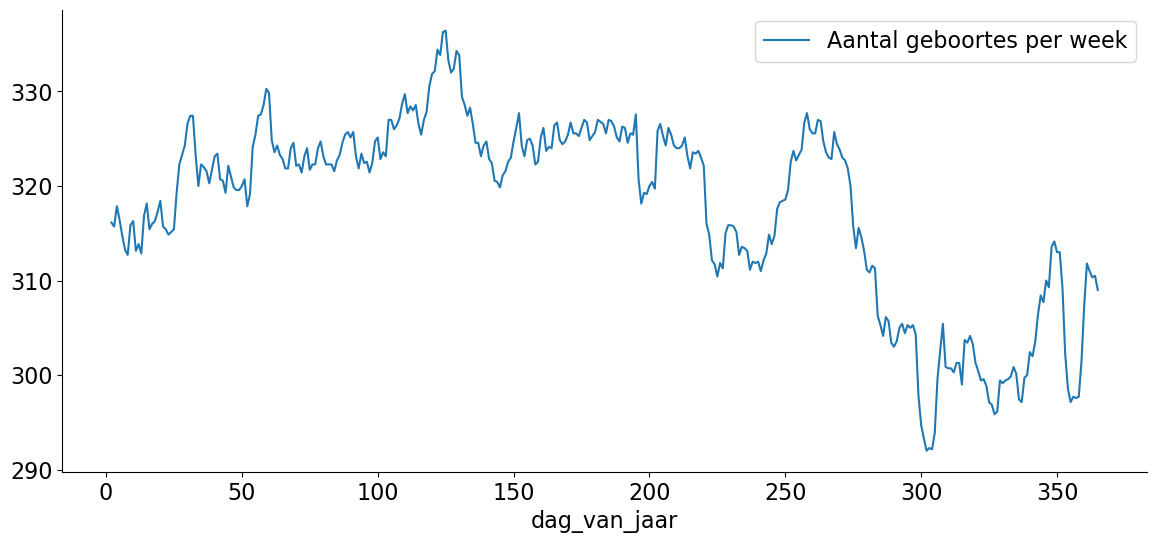

In [59]:
# Create a new DataFrame to store results
result_df = pd.DataFrame(columns=['gebdatum', 'geb7'])

# Create empty list for daily 7-day-average of 'aantal geboortes' 
next_7 = []

# Iterate through each date of dataFrame
for index, row in df_birth_birthday.iterrows():
    geb_datum = row['geboortedatum']
    
    # Get index of current geboortedatum
    start_index = df_birth_birthday.index.get_loc(index)
    
    # Get next 7 rows starting from current geboortedatum
    next_7_rows = (df_birth_birthday.iloc[start_index:start_index + 7])
    
    # Calculate average of 'aantal geboortes' and put in list
    next_7_mean = np.mean(next_7_rows['aantal geboortes'])
    next_7.append(next_7_mean)

next_7_series = pd.Series(next_7)
df_birth_birthday['Rollende week geboortes'] = next_7_series.values

# Make plot
plt.plot(df_birth_birthday['dag_van_jaar'], df_birth_birthday['Rollende week geboortes'], label = 'Aantal geboortes per week')
plt.xlabel('dag_van_jaar')
plt.legend();

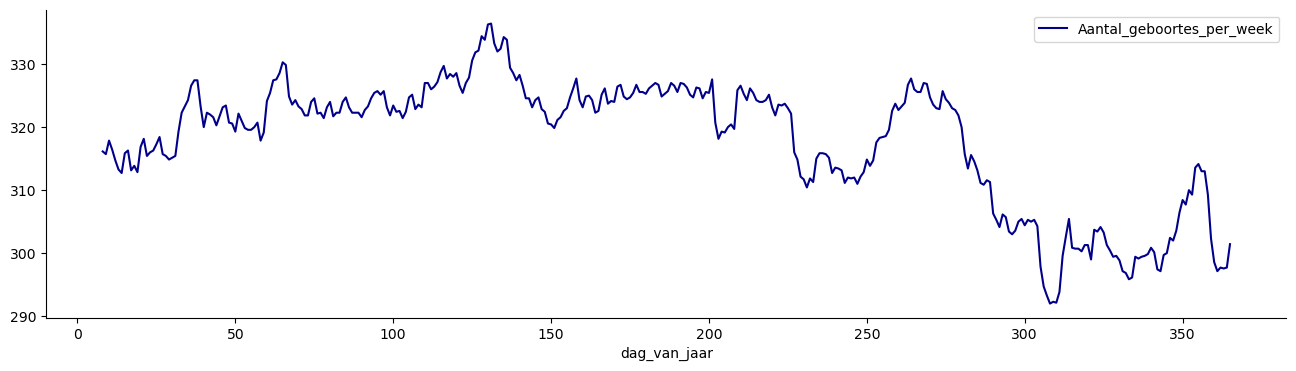

Dat ziet er al een stuk mooier uit!  We zien ook een aantal duidelijk dips & pieken verschijnen die we eerder niet zagen. We kunnen nu ook even kijken naar het gemiddeld aantal geboortes per dag van de week! Misschien worden er wel gewoon veel minder mensen geboren op zondag dan een andere dag?

In [63]:
# df_birth_birthday[].head(3)

,geboortedatum,aantal geboortes,dag_van_jaar,Rollende week geboortes,weekdag
0,2019-01-02,310,2,316.142857,Wednesday
1,2019-01-03,317,3,315.714286,Thursday
2,2019-01-04,319,4,317.857143,Friday


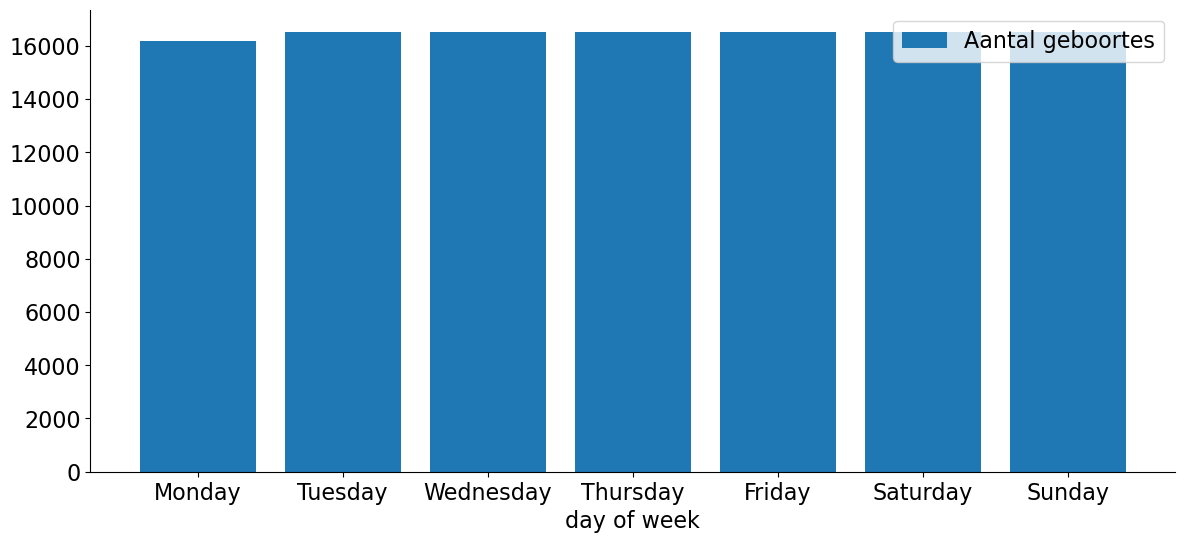

In [82]:
# Add new column 'weekdag' to df_birth_birthday 
df_birth_birthday['weekdag'] = df_birth_birthday.geboortedatum.dt.day_name()
# df_birth_birthday

# Make df 'weekdag' - 'rollende week geboortes'
df_birth_weekday = (df_birth_birthday[['weekdag', 'Rollende week geboortes']]
                    .groupby('weekdag')
                    .sum()
                    .reset_index()
                   )

# Sort on 'weekdag' by making use of list of sorted weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_birth_weekday['weekdag'] = pd.Categorical(df_birth_weekday.weekdag,categories=weekdays)
df_birth_weekday = df_birth_weekday.sort_values('weekdag')

# Make plot
plt.bar(df_birth_weekday['weekdag'], df_birth_weekday['Rollende week geboortes'], label = 'Aantal geboortes')
plt.xlabel('day of week')
plt.legend();

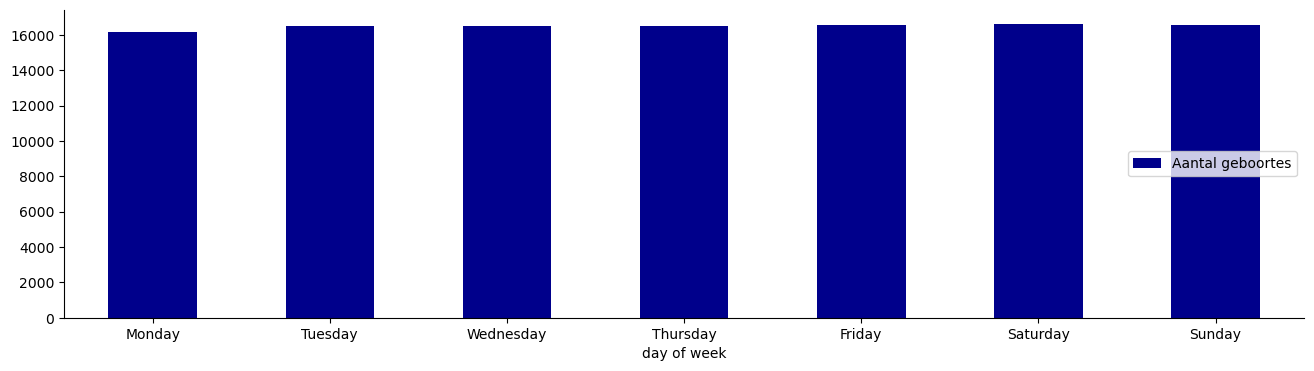